# Importing Libraries

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import re
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.sparse import issparse
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Importing Datasets

In [2]:
# Loading the datasets
train_data = pd.read_csv('train_data.csv', encoding='ISO-8859-1')
train_label = pd.read_csv('train_label.csv', encoding='ISO-8859-1')
test_data = pd.read_csv('test_data.csv', encoding='ISO-8859-1')
submission_df = pd.read_csv('sample_submission.csv', encoding='ISO-8859-1')

# Data Understanding

In [3]:
train_data.head(10)

,text,id
0,"Keep your gloves, hats, coats and jackets toge...",122885
1,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958
2,The Bosch 18-Volt lithium-ion line of Cordless...,146065
3,Restore your Porter-Cable sander or polisher t...,165138
4,The SPIKECUBE Surge Suppressor from Tripp Lite...,185565
5,These speed nuts are made of stamped spring st...,203659
6,Safer Brand 32 oz. Grub Killer Ready to Spray ...,208694
7,7 x 19 wire rope is constructed of seven stran...,164481
8,Barclay's Darla Freestanding Toilet Paper Hold...,173391
9,The Strength rug pad offers up to 10 years of ...,167377


In [4]:
train_data.tail()

,text,id
41564,These machine screws are used with nuts or dir...,197915
41565,The Lithonia Lighting 1-Light Low Profile Flus...,130100
41566,This industrial grade anti-fatigue mat is engi...,171764
41567,The Nite Ize LED Upgrade Kit converts most C/D...,117326
41568,For the most comprehensive selection of nails ...,160856


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41569 entries, 0 to 41568
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    41569 non-null  object
 1   id      41569 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 649.6+ KB


In [7]:
train_data.describe()

,id
count,41569.000000
mean,169719.321923
std,36614.144238
min,100003.000000
25%,138742.000000
50%,176266.000000
75%,200083.000000
max,224423.000000


In [8]:
train_label.head(10)

,id,label
0,100003,Shape
1,100004,Voltage (volts)
2,100004,Wattage (watts)
3,100006,Wattage (watts)
4,100007,ENERGY STAR Certified
5,100008,Finish
6,100008,Indoor/Outdoor
7,100008,Package Quantity
8,100011,Features
9,100011,Included


In [9]:
train_label.tail()

,id,label
75165,224421,Wattage (watts)
75166,224422,Finish
75167,224422,Indoor/Outdoor
75168,224422,Package Quantity
75169,224423,Hardware Included


In [10]:
train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75170 entries, 0 to 75169
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      75170 non-null  int64 
 1   label   75170 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [11]:
train_label.describe()

,id
count,75170.000000
mean,169898.404723
std,36385.653606
min,100003.000000
25%,139466.250000
50%,176505.500000
75%,199842.000000
max,224423.000000


In [12]:
train_label.groupby('label').describe()

id                                         \
                           count           mean           std       min   
label                                                                     
Assembly Required         4266.0  167663.505626  38535.001147  100036.0   
Color                     4505.0  170995.702109  36444.538567  100035.0   
Commercial / Residential  6866.0  169452.923973  36233.073526  100042.0   
ENERGY STAR Certified     6509.0  169062.820556  36629.465336  100007.0   
Features                  3821.0  168296.490709  36680.915579  100011.0   
Finish                    3602.0  173815.609384  34226.591055  100008.0   
Flooring Product Type     4422.0  171714.611940  34827.823546  100064.0   
Hardware Included         5471.0  171679.303052  36090.284346  100012.0   
Included                  4465.0  168709.703024  36468.445537  100011.0   
Indoor/Outdoor            9420.0  169293.405839  36293.825538  100008.0   
Package Quantity          4995.0  173384.336937  35054.710580  100008.0   
Shape                     3516.0  171939.948521  35681.283834  100003.0   
Tools Product Type        4708.0  170837.338785  37515.343580  100038.0   
Voltage (volts)           4688.0  163102.770691  37651.095927  100004.0   
Wattage (watts)           3916.0  170199.374106  35562.489481  100004.0   

                                                                    
                                25%       50%        75%       max  
label                                                               
Assembly Required         132707.50  173888.0  201418.25  224388.0  
Color                     139985.00  177073.0  201452.00  224404.0  
Commercial / Residential  138635.00  176097.5  199126.25  224414.0  
ENERGY STAR Certified     138317.00  175816.0  198968.00  224406.0  
Features                  136419.00  174785.0  198659.00  224378.0  
Finish                    151121.75  179782.5  200634.25  224422.0  
Flooring Product Type     144306.75  178033.0  199387.00  224382.0  
Hardware Included         144972.00  178522.0  200819.00  224423.0  
Included                  137738.00  176105.0  198173.00  224421.0  
Indoor/Outdoor            138253.00  175694.5  199467.75  224422.0  
Package Quantity          149013.00  179858.0  201776.50  224422.0  
Shape                     146661.75  178828.0  200476.75  224421.0  
Tools Product Type        138779.75  177547.5  203110.00  224402.0  
Voltage (volts)           128469.50  168899.5  194708.75  224421.0  
Wattage (watts)           141363.00  176904.0  198953.50  224421.0

In [13]:
test_data.head(10)

,text,id
0,These machine screw nuts are designed to be us...,114689
1,The M18 FUEL Drill/Driver is the Most Powerful...,183172
2,Steel City 2-Gang 30 cu. in. Square Electrical...,217304
3,Native Collection Plus has Shaw's SilentStep P...,184115
4,Fasade decorative 4 ft. x 8 ft. vinyl wall pan...,103786
5,Makita's 7.2-Volt Lithium-Ion Cordless Hex Dri...,202789
6,The Penelope bath vanity in premium laminated ...,208062
7,Everbilt anti-siphon frost proof sillcock assu...,177644
8,This Professional High Temperature Glue Gun us...,117538
9,The SureSill 4-9/16 in. x 150 in. White PVC Sl...,198085


In [14]:
test_data.tail()

,text,id
10388,The New Defiant Bluetooth smart LED motion sec...,115500
10389,Keep hard-surface floors looking new by using ...,140963
10390,Rare Earth magnets are the strongest type of p...,210542
10391,This Drive Straight is good for using on compo...,166278
10392,The 50 lb. Freestanding Icemaker from Maxx Ice...,193481


In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10393 entries, 0 to 10392
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10393 non-null  object
 1   id      10393 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 162.5+ KB


In [16]:
test_data.describe()

,id
count,10393.000000
mean,169923.055518
std,36681.371265
min,100010.000000
25%,138915.000000
50%,176713.000000
75%,200790.000000
max,224424.000000


In [17]:
test_data.groupby('text').describe()

id                \
                                                   count      mean std   
text                                                                     
#1/4-14 x 1 in. Hex Washer Head Drill Point Cor...   1.0  177921.0 NaN   
#10-16 x 3/4 in. Hex Slot Hi-Hat Serrated Corro...   1.0  195517.0 NaN   
#10-16 x 3/4 in. Phillips Flat-Head Drill Point...   1.0  206444.0 NaN   
#6-14 1-Way/Rounded Remover and Driver 6 Pieces...   1.0  164620.0 NaN   
**This New Product is Currently Available for P...   1.0  215057.0 NaN   
...                                                  ...       ...  ..   
Zurn model# ZER6001PL-CP is a 3.0 GPF AquaSense...   1.0  186377.0 NaN   
hardware. Holes are drilled and countersunk for...   1.0  166335.0 NaN   
hyStik 890 2 in. x 11 yds. White Indoor Double ...   1.0  135307.0 NaN   
iBright Flat LED Panel Light is a well-designed...   1.0  221270.0 NaN   
low-voltage 12-Volt 150-Watt transformer. Conve...   1.0  144325.0 NaN   

                                                                        \
                                                         min       25%   
text                                                                     
#1/4-14 x 1 in. Hex Washer Head Drill Point Cor...  177921.0  177921.0   
#10-16 x 3/4 in. Hex Slot Hi-Hat Serrated Corro...  195517.0  195517.0   
#10-16 x 3/4 in. Phillips Flat-Head Drill Point...  206444.0  206444.0   
#6-14 1-Way/Rounded Remover and Driver 6 Pieces...  164620.0  164620.0   
**This New Product is Currently Available for P...  215057.0  215057.0   
...                                                      ...       ...   
Zurn model# ZER6001PL-CP is a 3.0 GPF AquaSense...  186377.0  186377.0   
hardware. Holes are drilled and countersunk for...  166335.0  166335.0   
hyStik 890 2 in. x 11 yds. White Indoor Double ...  135307.0  135307.0   
iBright Flat LED Panel Light is a well-designed...  221270.0  221270.0   
low-voltage 12-Volt 150-Watt transformer. Conve...  144325.0  144325.0   

                                                                        \
                                                         50%       75%   
text                                                                     
#1/4-14 x 1 in. Hex Washer Head Drill Point Cor...  177921.0  177921.0   
#10-16 x 3/4 in. Hex Slot Hi-Hat Serrated Corro...  195517.0  195517.0   
#10-16 x 3/4 in. Phillips Flat-Head Drill Point...  206444.0  206444.0   
#6-14 1-Way/Rounded Remover and Driver 6 Pieces...  164620.0  164620.0   
**This New Product is Currently Available for P...  215057.0  215057.0   
...                                                      ...       ...   
Zurn model# ZER6001PL-CP is a 3.0 GPF AquaSense...  186377.0  186377.0   
hardware. Holes are drilled and countersunk for...  166335.0  166335.0   
hyStik 890 2 in. x 11 yds. White Indoor Double ...  135307.0  135307.0   
iBright Flat LED Panel Light is a well-designed...  221270.0  221270.0   
low-voltage 12-Volt 150-Watt transformer. Conve...  144325.0  144325.0   

                                                              
                                                         max  
text                                                          
#1/4-14 x 1 in. Hex Washer Head Drill Point Cor...  177921.0  
#10-16 x 3/4 in. Hex Slot Hi-Hat Serrated Corro...  195517.0  
#10-16 x 3/4 in. Phillips Flat-Head Drill Point...  206444.0  
#6-14 1-Way/Rounded Remover and Driver 6 Pieces...  164620.0  
**This New Product is Currently Available for P...  215057.0  
...                                                      ...  
Zurn model# ZER6001PL-CP is a 3.0 GPF AquaSense...  186377.0  
hardware. Holes are drilled and countersunk for...  166335.0  
hyStik 890 2 in. x 11 yds. White Indoor Double ...  135307.0  
iBright Flat LED Panel Light is a well-designed...  221270.0  
low-voltage 12-Volt 150-Watt transformer. Conve...  144325.0  

[10393 rows x 8 columns]

In [18]:
submission_df.head()

,id,Indoor/Outdoor,Commercial / Residential,ENERGY STAR Certified,Hardware Included,Package Quantity,Flooring Product Type,Color,Tools Product Type,Included,Voltage (volts),Assembly Required,Features,Wattage (watts),Finish,Shape
0,114689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,183172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,217304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,184115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,103786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10393 entries, 0 to 10392
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        10393 non-null  int64  
 1   Indoor/Outdoor            10393 non-null  float64
 2   Commercial / Residential  10393 non-null  float64
 3   ENERGY STAR Certified     10393 non-null  float64
 4   Hardware Included         10393 non-null  float64
 5   Package Quantity          10393 non-null  float64
 6   Flooring Product Type     10393 non-null  float64
 7   Color                     10393 non-null  float64
 8   Tools Product Type        10393 non-null  float64
 9   Included                  10393 non-null  float64
 10  Voltage (volts)           10393 non-null  float64
 11  Assembly Required         10393 non-null  float64
 12  Features                  10393 non-null  float64
 13  Wattage (watts)           10393 non-null  float64
 14  Finish

# Joining Train and Label  Data to get final Data to Build Model

In [5]:
# Since the train_label contains multiple labels for some ids, we need to preprocess it for multi-label classification
# We will aggregate labels for each id into a list to prepare for multi-label binarization

# Aggregating labels by 'id'
agg_train_label = train_label.groupby('id')['label'].apply(list).reset_index()

# Merging aggregated labels with the train data
merged_train_data = pd.merge(train_data, agg_train_label, on='id', how='inner')

# Checking for any missing labels and filling them with empty list if any
merged_train_data['label'] = merged_train_data['label'].apply(lambda x: x if isinstance(x, list) else [])

# Display the merged_train_data to ensure correctness
merged_train_data.head()

,text,id,label
0,"Keep your gloves, hats, coats and jackets toge...",122885,"[Assembly Required, Finish, Hardware Included]"
1,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958,"[Commercial / Residential, Features, Flooring ..."
2,The Bosch 18-Volt lithium-ion line of Cordless...,146065,"[Tools Product Type, Voltage (volts)]"
3,Restore your Porter-Cable sander or polisher t...,165138,[Tools Product Type]
4,The SPIKECUBE Surge Suppressor from Tripp Lite...,185565,"[Commercial / Residential, Package Quantity]"


# Noise Removal

In [6]:
from nltk.tokenize import word_tokenize  #Spliting text into words or tokens
from nltk.corpus import stopwords #To handle stopwords dictionary
import string #To handle punctuations and special characters
import nltk

# Downloading NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stop_words = set(stopwords.words('english'))
def remove_noise(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

merged_train_data['clean_text'] = merged_train_data['text'].apply(remove_noise)  # After preprocessing the text column we wil creating this as a new column)
test_data['clean_text'] = test_data['text'].apply(remove_noise)

In [8]:
merged_train_data.head()

,text,id,label,clean_text
0,"Keep your gloves, hats, coats and jackets toge...",122885,"[Assembly Required, Finish, Hardware Included]",keep gloves hats coats jackets together need e...
1,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958,"[Commercial / Residential, Features, Flooring ...",home dynamix serendipity ivory x area rug made...
2,The Bosch 18-Volt lithium-ion line of Cordless...,146065,"[Tools Product Type, Voltage (volts)]",bosch line cordless reciprocal saws uses indus...
3,Restore your Porter-Cable sander or polisher t...,165138,[Tools Product Type],restore sander polisher original prowess repla...
4,The SPIKECUBE Surge Suppressor from Tripp Lite...,185565,"[Commercial / Residential, Package Quantity]",spikecube surge suppressor tripp lite direct s...


In [9]:
test_data.head()

,text,id,clean_text
0,These machine screw nuts are designed to be us...,114689,machine screw nuts designed used smaller machi...
1,The M18 FUEL Drill/Driver is the Most Powerful...,183172,fuel powerful cordless drill market length com...
2,Steel City 2-Gang 30 cu. in. Square Electrical...,217304,steel city cu square electrical box houses pro...
3,Native Collection Plus has Shaw's SilentStep P...,184115,native collection plus shaw silentstep plus pr...
4,Fasade decorative 4 ft. x 8 ft. vinyl wall pan...,103786,fasade decorative x vinyl wall panels easily t...


# Data Visualization

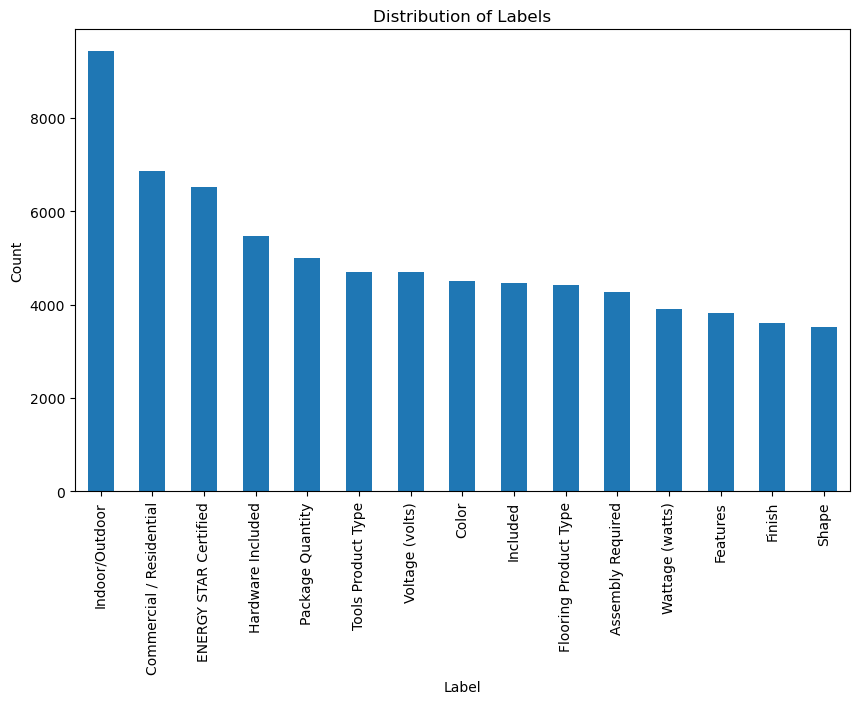

In [25]:
# Distribution of labels
plt.figure(figsize=(10, 6))
train_label['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

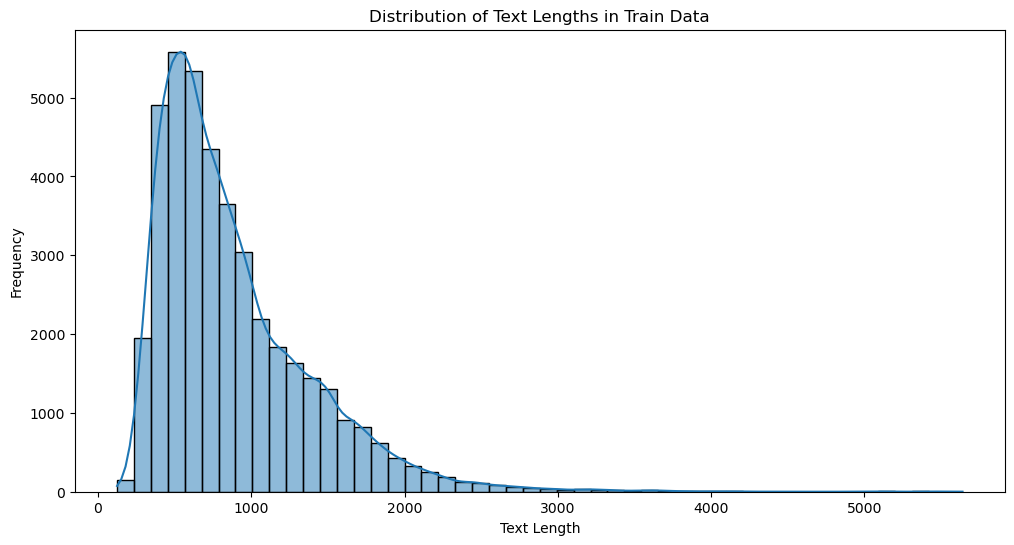

In [26]:
# Calculate the length of each text description
merged_train_data['text_length'] = train_data['text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(12, 6))
sns.histplot(merged_train_data['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths in Train Data')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

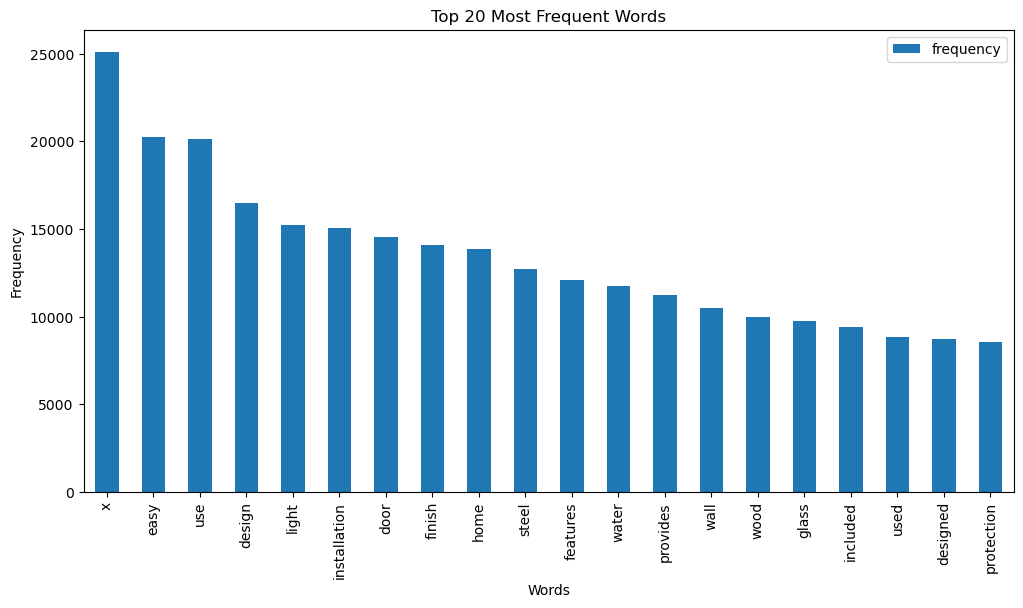

In [27]:
# Word frequency
from collections import Counter
word_freq = Counter(" ".join(merged_train_data['clean_text']).split())
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['frequency'])
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)
word_freq_df.head(20).plot(kind='bar', figsize=(12, 6))
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Model fitting

In [10]:
# Converting text data into numerical features using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(merged_train_data['clean_text'])

In [11]:
# Multi-Label Binarization
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(merged_train_data['label'])

In [12]:
# Splitting the dataset into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Checking how many records in train and validation sets
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(33255, 5000)
(8314, 5000)
(33255, 15)
(8314, 15)


In [15]:
# Model Training: MultiOutput Classifier with Logistic Regression
logreg_classifier = LogisticRegression(random_state=42)
multi_output_clf_logreg = MultiOutputClassifier(logreg_classifier, n_jobs=-1)
multi_output_clf_logreg.fit(X_train, y_train)

# Model Evaluation
predictions_logreg = multi_output_clf_logreg.predict(X_val)

# Performance metric evaluation

In [16]:
accuracy_logreg = accuracy_score(y_val, predictions_logreg)

# Checking accuracy
print('Logistic Regression Accuracy:', accuracy_logreg)
print(classification_report(y_val, predictions_logreg))

Logistic Regression Accuracy: 0.6432523454414241
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       874
           1       0.94      0.60      0.73       892
           2       0.97      0.81      0.88      1360
           3       0.96      0.84      0.90      1263
           4       0.96      0.80      0.88       742
           5       0.94      0.71      0.81       717
           6       0.99      0.94      0.96       866
           7       0.89      0.66      0.76      1087
           8       0.95      0.71      0.81       873
           9       0.90      0.81      0.85      1875
          10       0.95      0.74      0.83       986
          11       0.93      0.63      0.75       700
          12       0.97      0.86      0.92       977
          13       0.92      0.81      0.86       921
          14       0.91      0.76      0.83       759

   micro avg       0.94      0.77      0.85     14892
   macro avg       0.94      0.

C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# Predicting on test set
X_test = tfidf_vectorizer.transform(test_data['clean_text'])
lreg_test_preds = multi_output_clf_logreg.predict_proba(X_test)

In [18]:
lreg_test_preds

[array([[0.99546774, 0.00453226],
        [0.9934866 , 0.0065134 ],
        [0.96322941, 0.03677059],
        ...,
        [0.98343424, 0.01656576],
        [0.96481284, 0.03518716],
        [0.98056291, 0.01943709]]),
 array([[0.9953943 , 0.0046057 ],
        [0.98375702, 0.01624298],
        [0.96491444, 0.03508556],
        ...,
        [0.95331367, 0.04668633],
        [0.99462485, 0.00537515],
        [0.95875756, 0.04124244]]),
 array([[0.98914844, 0.01085156],
        [0.9915185 , 0.0084815 ],
        [0.99764988, 0.00235012],
        ...,
        [0.94409409, 0.05590591],
        [0.99671166, 0.00328834],
        [0.80250902, 0.19749098]]),
 array([[0.99457119, 0.00542881],
        [0.98802097, 0.01197903],
        [0.99267896, 0.00732104],
        ...,
        [0.98266718, 0.01733282],
        [0.99681725, 0.00318275],
        [0.68020883, 0.31979117]]),
 array([[0.99669253, 0.00330747],
        [0.99514638, 0.00485362],
        [0.99442956, 0.00557044],
        ...,
        [

In [49]:
# The `lreg_test_preds` is a list of arrays, where each array corresponds to a class in multi-output model.
# We will examine the probabilities for the first output:
print("Predicted probabilities for the first output:\n", lreg_test_preds[0])

# We have multiple outputs we will check their shapes or content, so we can iterate through them:
for i, probs in enumerate(lreg_test_preds):
    print(f"Shape of predicted probabilities for output {i+1}:", probs.shape)
    # And we want to see the actual probabilities (for example, the first few rows):
    print("Sample probabilities for this output:\n", probs[:5])


Predicted probabilities for the first output:
 [[0.99546774 0.00453226]
 [0.9934866  0.0065134 ]
 [0.96322941 0.03677059]
 ...
 [0.98343424 0.01656576]
 [0.96481284 0.03518716]
 [0.98056291 0.01943709]]
Shape of predicted probabilities for output 1: (10393, 2)
Sample probabilities for this output:
 [[0.99546774 0.00453226]
 [0.9934866  0.0065134 ]
 [0.96322941 0.03677059]
 [0.99687992 0.00312008]
 [0.9849188  0.0150812 ]]
Shape of predicted probabilities for output 2: (10393, 2)
Sample probabilities for this output:
 [[0.9953943  0.0046057 ]
 [0.98375702 0.01624298]
 [0.96491444 0.03508556]
 [0.96702149 0.03297851]
 [0.39634316 0.60365684]]
Shape of predicted probabilities for output 3: (10393, 2)
Sample probabilities for this output:
 [[0.98914844 0.01085156]
 [0.9915185  0.0084815 ]
 [0.99764988 0.00235012]
 [0.03477086 0.96522914]
 [0.91070531 0.08929469]]
Shape of predicted probabilities for output 4: (10393, 2)
Sample probabilities for this output:
 [[0.99457119 0.00542881]
 [0.98

In [56]:
# This assumes each output has two classes, we will check the probability of the positive class using index:
for i, col in enumerate(submission_df.columns[1:]):  # Skipping the first column IDs
    submission_df[col] = lreg_test_preds[i][:, 1]  # Assuming the second column is the positive class


In [57]:
submission_df.head()

,id,Indoor/Outdoor,Commercial / Residential,ENERGY STAR Certified,Hardware Included,Package Quantity,Flooring Product Type,Color,Tools Product Type,Included,Voltage (volts),Assembly Required,Features,Wattage (watts),Finish,Shape
0,114689,0.004532,0.004606,0.010852,0.005429,0.003307,0.764380,0.005399,0.010095,0.007528,0.600446,0.996876,0.004741,0.011487,0.015338,0.007662
1,183172,0.006513,0.016243,0.008482,0.011979,0.004854,0.005071,0.005373,0.007745,0.010839,0.014486,0.009500,0.001958,0.994657,0.933341,0.013586
2,217304,0.036771,0.035086,0.002350,0.007321,0.005570,0.019040,0.002746,0.011630,0.042826,0.012973,0.921303,0.012549,0.092997,0.053788,0.026704
3,184115,0.003120,0.032979,0.965229,0.037315,0.011824,0.017084,0.972008,0.021922,0.027627,0.860102,0.010769,0.015484,0.003978,0.003409,0.019234
4,103786,0.015081,0.603657,0.089295,0.016182,0.027585,0.116088,0.029152,0.094139,0.033610,0.131821,0.008374,0.048715,0.001568,0.013995,0.045031


In [58]:
submission_df.shape

(10393, 16)

In [59]:
# Defining the path for the updated submission file
lreg_ss = 'sample_submission_lreg.csv'

# Saving updated DataFrame to a new CSV file
submission_df.to_csv(lreg_ss, index=False)

In [62]:
logreg_ss = pd.read_csv('sample_submission_lreg.csv')

In [63]:
logreg_ss.head()

,id,Indoor/Outdoor,Commercial / Residential,ENERGY STAR Certified,Hardware Included,Package Quantity,Flooring Product Type,Color,Tools Product Type,Included,Voltage (volts),Assembly Required,Features,Wattage (watts),Finish,Shape
0,114689,0.004532,0.004606,0.010852,0.005429,0.003307,0.764380,0.005399,0.010095,0.007528,0.600446,0.996876,0.004741,0.011487,0.015338,0.007662
1,183172,0.006513,0.016243,0.008482,0.011979,0.004854,0.005071,0.005373,0.007745,0.010839,0.014486,0.009500,0.001958,0.994657,0.933341,0.013586
2,217304,0.036771,0.035086,0.002350,0.007321,0.005570,0.019040,0.002746,0.011630,0.042826,0.012973,0.921303,0.012549,0.092997,0.053788,0.026704
3,184115,0.003120,0.032979,0.965229,0.037315,0.011824,0.017084,0.972008,0.021922,0.027627,0.860102,0.010769,0.015484,0.003978,0.003409,0.019234
4,103786,0.015081,0.603657,0.089295,0.016182,0.027585,0.116088,0.029152,0.094139,0.033610,0.131821,0.008374,0.048715,0.001568,0.013995,0.045031


# Analyzing mistakes 

In [19]:
# Analyzing mistakes
misclassified_lreg = [i for i, (pred, true) in enumerate(zip(lreg_test_preds, y_val)) if pred != true]
for idx in misclassified_lreg[:5]:  # Displaying first 5 misclassified samples
    print("Misclassified Example:", X_val[idx])
    print("True Labels:", y_val[idx])
    print("Predicted Labels:", lreg_test_preds[idx])
    print()


Misclassified Example:   (0, 4646)	0.09316149703584631
  (0, 3892)	0.19942388230572963
  (0, 3913)	0.09289907144668245
  (0, 621)	0.09697387688958431
  (0, 654)	0.09214160476293017
  (0, 2594)	0.09214160476293017
  (0, 4837)	0.08709967588519923
  (0, 1527)	0.07678895596216904
  (0, 2778)	0.16471246852785623
  (0, 3755)	0.08709967588519923
  (0, 3011)	0.07702213604033781
  (0, 1104)	0.15179044023363503
  (0, 1789)	0.22725585964992676
  (0, 3915)	0.07045014544733554
  (0, 1173)	0.11891836799352369
  (0, 975)	0.2985024725156884
  (0, 1894)	0.06904674031700653
  (0, 3310)	0.06726107551811325
  (0, 439)	0.09470581006719747
  (0, 2980)	0.06819415706345394
  (0, 3171)	0.0833925551964125
  (0, 3890)	0.0671303282780056
  (0, 2586)	0.06685442533819619
  (0, 692)	0.06607674809814604
  (0, 3367)	0.04995446240522786
  :	:
  (0, 1428)	0.0692632820499555
  (0, 4350)	0.044276248143289135
  (0, 4734)	0.044111624172905664
  (0, 69)	0.052049077091705365
  (0, 3058)	0.05702916416139909
  (0, 4021)	0.05260

C:\Users\Tarun\AppData\Local\Temp\ipykernel_3232\5669794.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  misclassified_lreg = [i for i, (pred, true) in enumerate(zip(lreg_test_preds, y_val)) if pred != true]


# RandomForest Classifier

In [68]:
# Model Training: MultiOutput Classifier with Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
multi_output_clf = MultiOutputClassifier(rf_classifier, n_jobs=-1)
multi_output_clf.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42),
                      n_jobs=-1)

In [70]:
# Model Evaluation
predictions_rf = multi_output_clf.predict(X_val)
accuracy_rf = accuracy_score(y_val, predictions_rf)

In [71]:
# Checking accuracy
print('Random Forest Accuracy:', accuracy_rf)
print(classification_report(y_val, predictions_rf))

Random Forest Accuracy: 0.7177050757757999
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       874
           1       0.95      0.72      0.82       892
           2       0.98      0.84      0.91      1360
           3       0.97      0.88      0.92      1263
           4       0.98      0.87      0.92       742
           5       0.97      0.76      0.85       717
           6       0.99      0.95      0.97       866
           7       0.96      0.69      0.80      1087
           8       0.97      0.79      0.87       873
           9       0.95      0.83      0.88      1875
          10       0.98      0.77      0.86       986
          11       0.97      0.73      0.83       700
          12       0.96      0.88      0.92       977
          13       0.95      0.84      0.89       921
          14       0.96      0.76      0.85       759

   micro avg       0.97      0.81      0.88     14892
   macro avg       0.97      0.80    

C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# Predicting on test set
X_test = tfidf_vectorizer.transform(test_data['clean_text'])
rf_test_preds = multi_output_clf.predict_proba(X_test)

In [73]:
# The `rf_test_preds` is a list of arrays, where each array corresponds to a class in multi-output model.
# We will examine the probabilities for the first output:
print("Predicted probabilities for the first output:\n", rf_test_preds[0])

# We have multiple outputs we will check their shapes or content, so we can iterate through them:
for i, probs in enumerate(rf_test_preds):
    print(f"Shape of predicted probabilities for output {i+1}:", probs.shape)
    # And we want to see the actual probabilities (for example, the first few rows):
    print("Sample probabilities for this output:\n", probs[:5])


Predicted probabilities for the first output:
 [[1.   0.  ]
 [1.   0.  ]
 [0.97 0.03]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.94 0.06]]
Shape of predicted probabilities for output 1: (10393, 2)
Sample probabilities for this output:
 [[1.   0.  ]
 [1.   0.  ]
 [0.97 0.03]
 [1.   0.  ]
 [0.99 0.01]]
Shape of predicted probabilities for output 2: (10393, 2)
Sample probabilities for this output:
 [[1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [0.95 0.05]
 [0.23 0.77]]
Shape of predicted probabilities for output 3: (10393, 2)
Sample probabilities for this output:
 [[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.97 0.03]]
Shape of predicted probabilities for output 4: (10393, 2)
Sample probabilities for this output:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Shape of predicted probabilities for output 5: (10393, 2)
Sample probabilities for this output:
 [[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]]
Shape of predicted probabilities for output 6: (10393, 2)
Sample probabili

In [74]:
# This assumes each output has two classes, we will check the probability of the positive class using index:
for i, col in enumerate(submission_df.columns[1:]):  # Skipping the first column IDs
    submission_df[col] = rf_test_preds[i][:, 1]  # Assuming the second column is the positive class


In [75]:
# Define the path for the updated submission file
rf_ss = 'sample_submission_rf.csv'

# Saving updated DataFrame to a new CSV file
submission_df.to_csv(rf_ss, index=False)

In [76]:
rf_ss =  pd.read_csv('sample_submission_nb.csv')

In [77]:
rf_ss.head()

,id,Indoor/Outdoor,Commercial / Residential,ENERGY STAR Certified,Hardware Included,Package Quantity,Flooring Product Type,Color,Tools Product Type,Included,Voltage (volts),Assembly Required,Features,Wattage (watts),Finish,Shape
0,114689,0.002304,0.003453,0.001525,0.000992,0.001761,0.832696,0.000626,0.006292,0.006329,0.477716,0.998614,0.003904,0.042550,0.005174,0.000737
1,183172,0.001773,0.003455,0.000127,0.001713,0.000835,0.000725,0.000023,0.000605,0.007917,0.000970,0.002948,0.000240,0.999988,0.999657,0.001473
2,217304,0.033605,0.030377,0.004261,0.027038,0.003776,0.028387,0.000383,0.038818,0.078691,0.047367,0.782037,0.046027,0.039879,0.288205,0.023455
3,184115,0.001131,0.306560,0.998823,0.000507,0.001884,0.002127,0.999566,0.002387,0.002642,0.961655,0.000685,0.011297,0.000130,0.000155,0.000250
4,103786,0.012335,0.284390,0.033713,0.004971,0.011108,0.055447,0.005466,0.089906,0.014463,0.088697,0.007970,0.084920,0.000202,0.000596,0.003120


# Naive Bayes

In [32]:
# Model Training
nb_classifier = MultinomialNB()
multi_output_clf_nb = MultiOutputClassifier(nb_classifier)
multi_output_clf_nb.fit(X_train, y_train)

MultiOutputClassifier(estimator=MultinomialNB())

In [33]:
# Model Evaluation
predictions_nb = multi_output_clf_nb.predict(X_val)
accuracy_nb = accuracy_score(y_val, predictions_nb)

In [34]:
# Checking accuracy
print('Naive Bayes Accuracy:', accuracy_nb)
print(classification_report(y_val, predictions_nb))

Naive Bayes Accuracy: 0.4872504209766659
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       874
           1       0.84      0.45      0.58       892
           2       0.96      0.65      0.78      1360
           3       0.87      0.85      0.86      1263
           4       0.94      0.74      0.83       742
           5       0.85      0.65      0.74       717
           6       0.98      0.91      0.95       866
           7       0.79      0.58      0.67      1087
           8       0.89      0.60      0.71       873
           9       0.86      0.68      0.76      1875
          10       0.91      0.66      0.77       986
          11       0.91      0.49      0.64       700
          12       0.87      0.89      0.88       977
          13       0.73      0.85      0.79       921
          14       0.68      0.77      0.72       759

   micro avg       0.86      0.70      0.77     14892
   macro avg       0.86      0.70      

C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# Predicting on test set
X_test = tfidf_vectorizer.transform(test_data['clean_text'])
nb_test_preds = multi_output_clf_nb.predict_proba(X_test)

In [38]:
# The `nb_test_preds` is a list of arrays, where each array corresponds to a class in multi-output model.
# We will examine the probabilities for the first output:
print("Predicted probabilities for the first output:\n", nb_test_preds[0])

# We have multiple outputs we will check their shapes or content, so we can iterate through them:
for i, probs in enumerate(nb_test_preds):
    print(f"Shape of predicted probabilities for output {i+1}:", probs.shape)
    # And we want to see the actual probabilities (for example, the first few rows):
    print("Sample probabilities for this output:\n", probs[:5])


Predicted probabilities for the first output:
 [[0.99769564 0.00230436]
 [0.99822689 0.00177311]
 [0.96639457 0.03360543]
 ...
 [0.9914137  0.0085863 ]
 [0.98813114 0.01186886]
 [0.99221312 0.00778688]]
Shape of predicted probabilities for output 1: (10393, 2)
Sample probabilities for this output:
 [[0.99769564 0.00230436]
 [0.99822689 0.00177311]
 [0.96639457 0.03360543]
 [0.99886908 0.00113092]
 [0.98766486 0.01233514]]
Shape of predicted probabilities for output 2: (10393, 2)
Sample probabilities for this output:
 [[0.99654706 0.00345294]
 [0.99654479 0.00345521]
 [0.96962266 0.03037734]
 [0.69344023 0.30655977]
 [0.71561008 0.28438992]]
Shape of predicted probabilities for output 3: (10393, 2)
Sample probabilities for this output:
 [[9.98475088e-01 1.52491250e-03]
 [9.99873031e-01 1.26968514e-04]
 [9.95738701e-01 4.26129901e-03]
 [1.17665095e-03 9.98823349e-01]
 [9.66286871e-01 3.37131292e-02]]
Shape of predicted probabilities for output 4: (10393, 2)
Sample probabilities for this 

In [53]:
# This assumes each output has two classes, we will check the probability of the positive class using index:
for i, col in enumerate(submission_df.columns[1:]):  # Skipping the first column if IDs
    submission_df[col] = nb_test_preds[i][:, 1]  # Assuming the second column is the positive class

In [54]:
# Defining the path for the updated submission file
nb_ss = 'sample_submission_nb.csv'

# Saving updated DataFrame to a new CSV file
submission_df.to_csv(nb_ss, index=False)

In [55]:
nb_ss = pd.read_csv('sample_submission_nb.csv')

In [56]:
nb_ss.head()

,id,Indoor/Outdoor,Commercial / Residential,ENERGY STAR Certified,Hardware Included,Package Quantity,Flooring Product Type,Color,Tools Product Type,Included,Voltage (volts),Assembly Required,Features,Wattage (watts),Finish,Shape
0,114689,0.002304,0.003453,0.001525,0.000992,0.001761,0.832696,0.000626,0.006292,0.006329,0.477716,0.998614,0.003904,0.042550,0.005174,0.000737
1,183172,0.001773,0.003455,0.000127,0.001713,0.000835,0.000725,0.000023,0.000605,0.007917,0.000970,0.002948,0.000240,0.999988,0.999657,0.001473
2,217304,0.033605,0.030377,0.004261,0.027038,0.003776,0.028387,0.000383,0.038818,0.078691,0.047367,0.782037,0.046027,0.039879,0.288205,0.023455
3,184115,0.001131,0.306560,0.998823,0.000507,0.001884,0.002127,0.999566,0.002387,0.002642,0.961655,0.000685,0.011297,0.000130,0.000155,0.000250
4,103786,0.012335,0.284390,0.033713,0.004971,0.011108,0.055447,0.005466,0.089906,0.014463,0.088697,0.007970,0.084920,0.000202,0.000596,0.003120


# KNN Classifier

In [44]:
# Model Training
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
multi_output_clf_knn = MultiOutputClassifier(knn_classifier)
multi_output_clf_knn.fit(X_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier())

In [45]:
# Model Evaluation
predictions_knn = multi_output_clf_knn.predict(X_val)
accuracy_knn = accuracy_score(y_val, predictions_knn)

In [46]:
# Checking accuracy
print('KNN Accuracy:', accuracy_knn)
print(classification_report(y_val, predictions_knn))

KNN Accuracy: 0.8176569641568439
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       874
           1       0.91      0.85      0.88       892
           2       0.95      0.93      0.94      1360
           3       0.95      0.94      0.94      1263
           4       0.95      0.94      0.95       742
           5       0.89      0.86      0.88       717
           6       0.98      0.97      0.98       866
           7       0.86      0.86      0.86      1087
           8       0.91      0.88      0.89       873
           9       0.92      0.92      0.92      1875
          10       0.92      0.87      0.89       986
          11       0.89      0.86      0.87       700
          12       0.95      0.92      0.93       977
          13       0.88      0.91      0.90       921
          14       0.87      0.88      0.87       759

   micro avg       0.92      0.90      0.91     14892
   macro avg       0.92      0.90      0.91    

C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# Predicting on test set
X_test = tfidf_vectorizer.transform(test_data['clean_text'])
knn_test_preds = multi_output_clf_knn.predict_proba(X_test)

In [48]:
# The `knn_test_preds` is a list of arrays, where each array corresponds to a class in multi-output model.
# We will examine the probabilities for the first output:
print("Predicted probabilities for the first output:\n", knn_test_preds[0])

# We have multiple outputs we will check their shapes or content, so we can iterate through them:
for i, probs in enumerate(knn_test_preds):
    print(f"Shape of predicted probabilities for output {i+1}:", probs.shape)
    # And we want to see the actual probabilities (for example, the first few rows):
    print("Sample probabilities for this output:\n", probs[:5])


Predicted probabilities for the first output:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Shape of predicted probabilities for output 1: (10393, 2)
Sample probabilities for this output:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Shape of predicted probabilities for output 2: (10393, 2)
Sample probabilities for this output:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
Shape of predicted probabilities for output 3: (10393, 2)
Sample probabilities for this output:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
Shape of predicted probabilities for output 4: (10393, 2)
Sample probabilities for this output:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Shape of predicted probabilities for output 5: (10393, 2)
Sample probabilities for this output:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Shape of predicted probabilities for output 6: (10393, 2)
Sample probabilities for this output:
 [[0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]]
Shape of predicted probab

In [49]:
# This assumes each output has two classes, we will check the probability of the positive class using index:
for i, col in enumerate(submission_df.columns[1:]):  # Skipping the first column IDs
    submission_df[col] = knn_test_preds[i][:, 1]  # Assuming the second column is the positive class

In [50]:
# Defining the path for the updated submission file
knn_ss = 'sample_submission_knn.csv'

# Saving updated DataFrame to a new CSV file
submission_df.to_csv(knn_ss, index=False)

In [51]:
knn_ss = pd.read_csv('sample_submission_knn.csv')

In [52]:
knn_ss.head()

,id,Indoor/Outdoor,Commercial / Residential,ENERGY STAR Certified,Hardware Included,Package Quantity,Flooring Product Type,Color,Tools Product Type,Included,Voltage (volts),Assembly Required,Features,Wattage (watts),Finish,Shape
0,114689,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.2,1.0,0.0,0.0,0.0,0.0
1,183172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,217304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,184115,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,103786,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# AdaBoostClassifier

In [22]:
# Model Training
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
multi_output_clf_ada = MultiOutputClassifier(ada_classifier)
multi_output_clf_ada.fit(X_train, y_train)

MultiOutputClassifier(estimator=AdaBoostClassifier())

In [23]:
# Model Evaluation
predictions_ada = multi_output_clf_ada.predict(X_val)
accuracy_ada = accuracy_score(y_val, predictions_ada)

In [24]:
# Checking accuracy
print('AdaBoost Accuracy:', accuracy_ada)
print(classification_report(y_val, predictions_ada))

AdaBoost Accuracy: 0.39968727447678615
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       874
           1       0.75      0.38      0.50       892
           2       0.90      0.68      0.78      1360
           3       0.88      0.76      0.81      1263
           4       0.86      0.68      0.76       742
           5       0.74      0.56      0.64       717
           6       0.96      0.94      0.95       866
           7       0.68      0.47      0.55      1087
           8       0.80      0.55      0.65       873
           9       0.74      0.59      0.66      1875
          10       0.79      0.60      0.68       986
          11       0.74      0.47      0.57       700
          12       0.90      0.76      0.82       977
          13       0.75      0.60      0.67       921
          14       0.77      0.66      0.71       759

   micro avg       0.81      0.62      0.70     14892
   macro avg       0.80      0.62      0.

C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Predict on test set
X_test = tfidf_vectorizer.transform(test_data['clean_text'])
ada_test_preds = multi_output_clf_ada.predict_proba(X_test)

In [26]:
# The `ada_test_preds` is a list of arrays, where each array corresponds to a class in multi-output model.
# We will examine the probabilities for the first output:
print("Predicted probabilities for the first output:\n", ada_test_preds[0])

# We have multiple outputs we will check their shapes or content, so we can iterate through them:
for i, probs in enumerate(ada_test_preds):
    print(f"Shape of predicted probabilities for output {i+1}:", probs.shape)
    # And we want to see the actual probabilities (for example, the first few rows):
    print("Sample probabilities for this output:\n", probs[:5])


Predicted probabilities for the first output:
 [[0.5304409  0.4695591 ]
 [0.51793618 0.48206382]
 [0.51793618 0.48206382]
 ...
 [0.51793618 0.48206382]
 [0.51176601 0.48823399]
 [0.52611473 0.47388527]]
Shape of predicted probabilities for output 1: (10393, 2)
Sample probabilities for this output:
 [[0.5304409  0.4695591 ]
 [0.51793618 0.48206382]
 [0.51793618 0.48206382]
 [0.52700573 0.47299427]
 [0.52664806 0.47335194]]
Shape of predicted probabilities for output 2: (10393, 2)
Sample probabilities for this output:
 [[0.51648646 0.48351354]
 [0.55816311 0.44183689]
 [0.52311481 0.47688519]
 [0.48422342 0.51577658]
 [0.50278572 0.49721428]]
Shape of predicted probabilities for output 3: (10393, 2)
Sample probabilities for this output:
 [[0.51480632 0.48519368]
 [0.52637868 0.47362132]
 [0.53079652 0.46920348]
 [0.45257141 0.54742859]
 [0.52373689 0.47626311]]
Shape of predicted probabilities for output 4: (10393, 2)
Sample probabilities for this output:
 [[0.52046557 0.47953443]
 [0.52

In [27]:
# This assumes each output has two classes, we will check the probability of the positive class using index:
for i, col in enumerate(submission_df.columns[1:]):  # Skipping the first column IDs
    submission_df[col] = ada_test_preds[i][:, 1]  # Assuming the second column is the positive class


In [28]:
# Defining the path for the updated submission file
ada_ss = 'sample_submission_ada.csv'

# Saving updated DataFrame to a new CSV file
submission_df.to_csv(ada_ss, index=False)

In [29]:
ada_ss = pd.read_csv('sample_submission_ada.csv')
ada_ss.head()

,id,Indoor/Outdoor,Commercial / Residential,ENERGY STAR Certified,Hardware Included,Package Quantity,Flooring Product Type,Color,Tools Product Type,Included,Voltage (volts),Assembly Required,Features,Wattage (watts),Finish,Shape
0,114689,0.469559,0.483514,0.485194,0.479534,0.472249,0.513726,0.461240,0.484223,0.477852,0.511688,0.532549,0.480858,0.486829,0.470045,0.473232
1,183172,0.482064,0.441837,0.473621,0.474318,0.464717,0.450792,0.455368,0.479994,0.471755,0.468531,0.478639,0.464254,0.523491,0.519346,0.463864
2,217304,0.482064,0.476885,0.469203,0.470933,0.472249,0.311898,0.464467,0.462407,0.471855,0.491605,0.505286,0.485566,0.486829,0.466728,0.467282
3,184115,0.472994,0.515777,0.547429,0.472174,0.479966,0.455406,0.567181,0.468814,0.427572,0.513601,0.457729,0.467013,0.442018,0.460036,0.462020
4,103786,0.473352,0.497214,0.476263,0.473800,0.472249,0.457168,0.473362,0.481753,0.466221,0.498912,0.462980,0.492908,0.423242,0.490800,0.458739


# DecisionTreeClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
# Model Training
dt_classifier = DecisionTreeClassifier()
multi_output_clf_dt = MultiOutputClassifier(dt_classifier)
multi_output_clf_dt.fit(X_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier())

In [14]:
# Model Evaluation
predictions_dt = multi_output_clf_dt.predict(X_val)
accuracy_dt = accuracy_score(y_val, predictions_dt)

In [15]:
# Checking accuracy
print('Decision Tree Accuracy:', accuracy_dt)
print(classification_report(y_val, predictions_dt))

Decision Tree Accuracy: 0.6235265816694732
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       874
           1       0.76      0.76      0.76       892
           2       0.90      0.87      0.89      1360
           3       0.87      0.87      0.87      1263
           4       0.90      0.88      0.89       742
           5       0.80      0.77      0.78       717
           6       0.96      0.95      0.95       866
           7       0.76      0.74      0.75      1087
           8       0.85      0.81      0.83       873
           9       0.85      0.84      0.85      1875
          10       0.80      0.79      0.79       986
          11       0.81      0.79      0.80       700
          12       0.87      0.85      0.86       977
          13       0.82      0.83      0.83       921
          14       0.80      0.82      0.81       759

   micro avg       0.84      0.83      0.83     14892
   macro avg       0.84      0.82    

C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# Predicting on test set
X_test = tfidf_vectorizer.transform(test_data['clean_text'])
dt_test_preds = multi_output_clf_dt.predict_proba(X_test)

In [18]:
# The `dt_test_preds` is a list of arrays, where each array corresponds to a class in multi-output model.
# We will examine the probabilities for the first output:
print("Predicted probabilities for the first output:\n", dt_test_preds[0])

# We have multiple outputs we will check their shapes or content, so we can iterate through them:
for i, probs in enumerate(dt_test_preds):
    print(f"Shape of predicted probabilities for output {i+1}:", probs.shape)
    # And we want to see the actual probabilities (for example, the first few rows):
    print("Sample probabilities for this output:\n", probs[:5])


Predicted probabilities for the first output:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Shape of predicted probabilities for output 1: (10393, 2)
Sample probabilities for this output:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Shape of predicted probabilities for output 2: (10393, 2)
Sample probabilities for this output:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
Shape of predicted probabilities for output 3: (10393, 2)
Sample probabilities for this output:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
Shape of predicted probabilities for output 4: (10393, 2)
Sample probabilities for this output:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Shape of predicted probabilities for output 5: (10393, 2)
Sample probabilities for this output:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Shape of predicted probabilities for output 6: (10393, 2)
Sample probabilities for this output:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Shape of predicted probabilities fo

In [19]:
# This assumes each output has two classes, we will check the probability of the positive class using index:
for i, col in enumerate(submission_df.columns[1:]):  # Skipping the first column IDs
    submission_df[col] = dt_test_preds[i][:, 1]  # Assuming the second column is the positive class


In [20]:
# Defining the path for the updated submission file
dt_ss = 'sample_submission_dt.csv'

# Saving updated DataFrame to a new CSV file
submission_df.to_csv(dt_ss, index=False)

In [22]:
dt_ss = pd.read_csv('sample_submission_dt.csv')
dt_ss.head()

,id,Indoor/Outdoor,Commercial / Residential,ENERGY STAR Certified,Hardware Included,Package Quantity,Flooring Product Type,Color,Tools Product Type,Included,Voltage (volts),Assembly Required,Features,Wattage (watts),Finish,Shape
0,114689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,183172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,217304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,184115,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,103786,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# GradientBoostingClassifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

# Model Training
gb_classifier = GradientBoostingClassifier()
multi_output_clf_gb = MultiOutputClassifier(gb_classifier)
multi_output_clf_gb.fit(X_train, y_train)

MultiOutputClassifier(estimator=GradientBoostingClassifier())

In [24]:
# Model Evaluation
predictions_gb = multi_output_clf_gb.predict(X_val)
accuracy_gb = accuracy_score(y_val, predictions_gb)

In [25]:
# Checking accuracy
print('Gradient Boosting Accuracy:', accuracy_gb)
print(classification_report(y_val, predictions_gb))

Gradient Boosting Accuracy: 0.45212893913880203
              precision    recall  f1-score   support

           0       0.96      0.58      0.72       874
           1       0.96      0.37      0.54       892
           2       0.98      0.66      0.79      1360
           3       0.94      0.76      0.84      1263
           4       0.95      0.68      0.79       742
           5       0.94      0.51      0.66       717
           6       0.98      0.91      0.95       866
           7       0.91      0.42      0.57      1087
           8       0.95      0.56      0.70       873
           9       0.88      0.55      0.68      1875
          10       0.97      0.50      0.66       986
          11       0.95      0.46      0.62       700
          12       0.95      0.68      0.79       977
          13       0.92      0.61      0.73       921
          14       0.91      0.65      0.76       759

   micro avg       0.94      0.60      0.73     14892
   macro avg       0.94      0.5

C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Predicting on test set
X_test = tfidf_vectorizer.transform(test_data['clean_text'])
gb_test_preds = multi_output_clf_gb.predict_proba(X_test)

In [27]:
# The `gb_test_preds` is a list of arrays, where each array corresponds to a class in multi-output model.
# We will examine the probabilities for the first output:
print("Predicted probabilities for the first output:\n", gb_test_preds[0])

# We have multiple outputs we will check their shapes or content, so we can iterate through them:
for i, probs in enumerate(gb_test_preds):
    print(f"Shape of predicted probabilities for output {i+1}:", probs.shape)
    # And if you want to see the actual probabilities (for example, the first few rows):
    print("Sample probabilities for this output:\n", probs[:5])


Predicted probabilities for the first output:
 [[0.9665825  0.0334175 ]
 [0.9665825  0.0334175 ]
 [0.9665825  0.0334175 ]
 ...
 [0.9665825  0.0334175 ]
 [0.96249933 0.03750067]
 [0.8740898  0.1259102 ]]
Shape of predicted probabilities for output 1: (10393, 2)
Sample probabilities for this output:
 [[0.9665825  0.0334175 ]
 [0.9665825  0.0334175 ]
 [0.9665825  0.0334175 ]
 [0.96869416 0.03130584]
 [0.97120946 0.02879054]]
Shape of predicted probabilities for output 2: (10393, 2)
Sample probabilities for this output:
 [[0.92857372 0.07142628]
 [0.93817276 0.06182724]
 [0.92857372 0.07142628]
 [0.88053039 0.11946961]
 [0.88951847 0.11048153]]
Shape of predicted probabilities for output 3: (10393, 2)
Sample probabilities for this output:
 [[0.93211095 0.06788905]
 [0.94527215 0.05472785]
 [0.94527215 0.05472785]
 [0.05327862 0.94672138]
 [0.94527215 0.05472785]]
Shape of predicted probabilities for output 4: (10393, 2)
Sample probabilities for this output:
 [[0.96991541 0.03008459]
 [0.96

In [28]:
# This assumes each output has two classes, we will check the probability of the positive class using index:
for i, col in enumerate(submission_df.columns[1:]):  # Skipping the first column IDs
    submission_df[col] = gb_test_preds[i][:, 1]  # Assuming the second column is the positive class


In [29]:
# Defining the path for the updated submission file
gb_ss = 'sample_submission_gb.csv'

# Saving updated DataFrame to a new CSV file
submission_df.to_csv(gb_ss, index=False)

In [30]:
gb_ss = pd.read_csv('sample_submission_gb.csv')
gb_ss.head()

,id,Indoor/Outdoor,Commercial / Residential,ENERGY STAR Certified,Hardware Included,Package Quantity,Flooring Product Type,Color,Tools Product Type,Included,Voltage (volts),Assembly Required,Features,Wattage (watts),Finish,Shape
0,114689,0.033417,0.071426,0.067889,0.030085,0.025800,0.770889,0.009288,0.067335,0.047090,0.658650,0.928670,0.039099,0.040264,0.026291,0.020832
1,183172,0.033417,0.061827,0.054728,0.037110,0.025800,0.023473,0.009288,0.054656,0.047090,0.142591,0.035985,0.039099,0.981635,0.956768,0.037303
2,217304,0.033417,0.071426,0.054728,0.027547,0.025800,0.035138,0.009288,0.076264,0.047090,0.111440,0.177007,0.050784,0.040264,0.083580,0.020832
3,184115,0.031306,0.119470,0.946721,0.049371,0.028699,0.031379,0.986525,0.066101,0.047090,0.807777,0.059375,0.041011,0.021099,0.028316,0.028424
4,103786,0.028791,0.110482,0.054728,0.030085,0.025800,0.056591,0.011264,0.075878,0.054628,0.229113,0.050193,0.041204,0.028685,0.034824,0.020832
